## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torch.nn

#!pip install --upgrade torch torchvision
torch.cuda.is_available()

True

In [ ]:
import sklearn
import sklearn.preprocessing as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
#import multicoreTSNE
#from MulticoreTSNE import MulticoreTSNE as mTSNE


warnings.filterwarnings(action='ignore')

df=pd.read_csv('/content/drive/MyDrive/신용카드AI/val.csv')
train_df=pd.read_csv('/content/drive/MyDrive/신용카드AI/train.csv')

## t-SNE 하이퍼파라미터
1. **n_components(*int, default=20*)** :차원 축소 결과 임베딩되는 차원입니다. 보통 시각화가 가능한 2,3차원정도로 축소하는 듯합니다.
2. **perplexity(*float,30.0*)** : 다른 manifold learning의 nearest neighbors 갯수에 사용되는 값을 뜻합니다. 일반적으로 더 큰 데이터 셋은 보통 더 큰 perplexity 값을 필요로 합니다. 이 값을 정할 때, 5 ~ 50 사이의 값을 선택해 보고 더 좋은 결과를 얻기 위해서 값을 변경해 가면서 조정할 필요가 있습니다.
3. **early_exaggeration(*float, default=12.0*)** : 기존 공간에서 데이터의 클러스터 간 거리가 타겟 공간에서 얼만큼 조밀하거나 먼 지 나타내는 파라미터 입니다. 이 값을 큰 값으로 설정할 경우 기존 공간의 클러스터 사이의 공간이 타겟 공간에서 더 커지도록 학습됩니다. 이 매개 변수의 선택은 크게 중요하지는 않으나 학습 초기에 비용 함수가 증가하면 early_exaggeration 또는 initial learning rate가 너무 높을 수 있으니 이 경우 살펴 보면 됩니다.
4. **learning_rate(*float, default=200.0*)** : 학습을 할 때 사용하는 learning rate 이며 일반적으로 10 ~ 1000 사이의 값을 가집니다. learning rate가 너무 높으면 데이터가 가장 가까운 이웃과 거의 같은 거리에있는 ‘공’처럼 보일 수 있습니다. 반면 learning rate가 너무 낮으면 대부분의 포인트가 특이치가 거의 없는 조밀 한 클라우드에서 압축 된 것처럼 보일 수 있습니다.
5. **n_iter(*int,default=1000*)** : 최적화를 위한 최대 반복 횟수입니다. 이 값은 최소 250 이상이어야 학습하는 데 지장이 없습니다.
6.**n_iter_without_progress(*int, default=300*)** : 성능 개선 없이 학습이 지속되면 학습을 중지하는 옵션이며 카운트는 50의 배수 단위로 카운트 됩니다.
7. **random_state(float)**

## tsne 사용법
- 기본적인 순서와 주요 파라미터들을 작성해두었습니다.
- 파라미터 변환하면서 차원축소 진행 원하시는 분들은 해당 내용 참고하시면 될 것 같습니다.

In [ ]:
from sklearn.manifold import tSNE
from sklearn.preprocessing import StandardScaler

#데이터 불러오기
data = data

#데이터 정규화
scr = StandardScaler()
sample_features = scr.fit_transform(data)

#t-sne 모델 생성
model = TSNE(n_components=None,random_state=None, perplexity=None, n_iter=None)
embedded data = model.fit_transform(data)
print("TSNE done in %0.3fs." % (time()-t0)) #소요시간 기록

#학습한 결과 출력
#추후 업데이트해두도록 하겠습니다.


## train data 3차원 차원축소

In [ ]:
from sklearn.manifold import TSNE

scr = StandardScaler()
train_df = scr.fit_transform(train_df)

# 3차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE(n_components=3).fit_transform(train_df)

#numpy array -> DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2','new_V3'])

In [ ]:
tsne_df.to_csv('/content/drive/MyDrive/신용카드AI/t-sne 3 features.csv')

## train data 2차원 차원 축소

In [ ]:
from sklearn.manifold import TSNE

scr = StandardScaler()
train_df = scr.fit_transform(train_df)

# 3차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE(n_components=2,perplexity=50,n_iter=500).fit_transform(train_df)

#numpy array -> DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2'])

#데이터프레임으로 저장
tsne_df.to_csv('/content/drive/MyDrive/신용카드AI/t-sne 2 features.csv')

## Valid Dataset TSNE Plots

### 정규화 진행 X

(28462, 31) (28462, 1)
TSNE done in 441.115s.
(28462, 3)


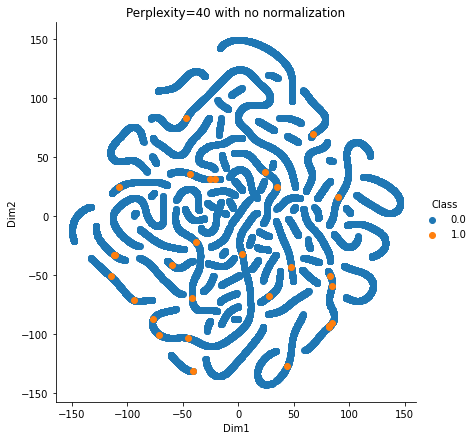

In [ ]:
from time import time

# 데이터프레임에서 class(=target feature)분리
sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
print(sample_features.shape,sample_class.shape)

# 종속변수들로만 t-SNE 모델 구성
model = TSNE(n_components=2,random_state=0,perplexity=40,n_iter=2000)

# 임베딩
# 소요 시간 기록
t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

# 분리했던 class열 결합하여 scatterplot class별 분포 시각화
final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.show()

### 정규화 진행,perplexity=20

(28462, 31) (28462, 1)
TSNE done in 314.905s.
(28462, 3)


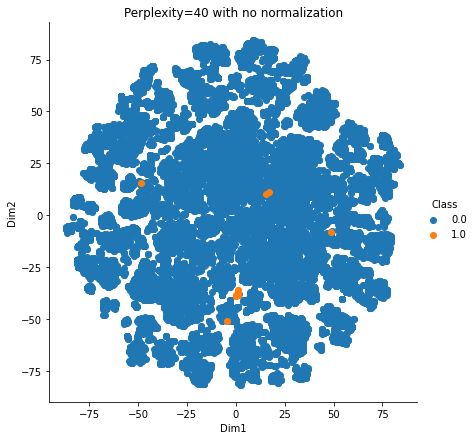

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터프레임에서 class(=target feature)분리
sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)

# 종속변수들로만 t-SNE 모델 구성
model = TSNE(n_components=2,random_state=0,perplexity=20)

# 임베딩
# 소요 시간 기록
t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

# 분리했던 class열 결합하여 scatterplot class별 분포 시각화
final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.show()

### 정규화, perplexity=20, random_state=42

(28462, 31) (28462, 1)
TSNE done in 295.540s.
(28462, 3)


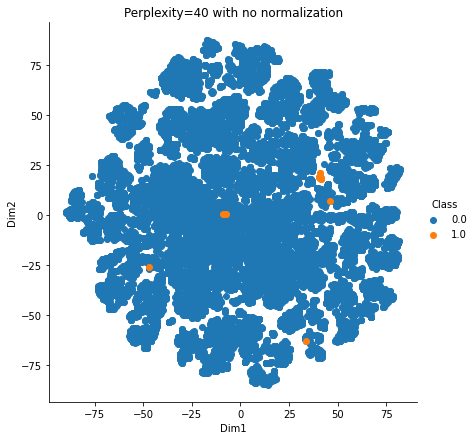

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터프레임에서 class(=target feature)분리
sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)

# 종속변수들로만 t-SNE 모델 구성
model = TSNE(n_components=2,random_state=42,perplexity=20)

# 임베딩
# 소요 시간 기록
t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

# 분리했던 class열 결합하여 scatterplot class별 분포 시각화
final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=40 with no normalization")
plt.show()

# 차원축소 method간 비교

## imbalanced data 그대로 활용

In [ ]:
import time
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(sample_features)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(sample_features)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(sample_features)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.2e+02 s
PCA took 0.084 s
Truncated SVD took 0.087 s


(28462, 3)


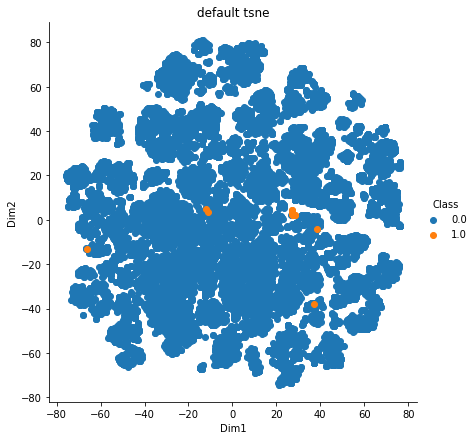

(28462, 3)


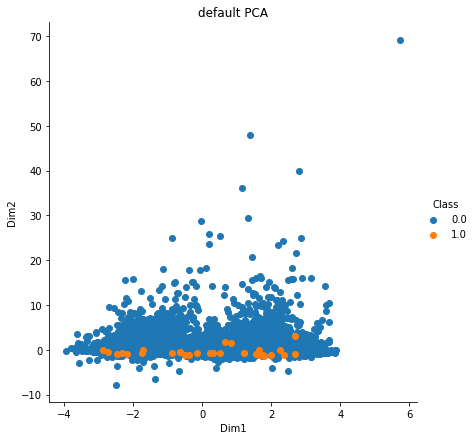

(28462, 3)


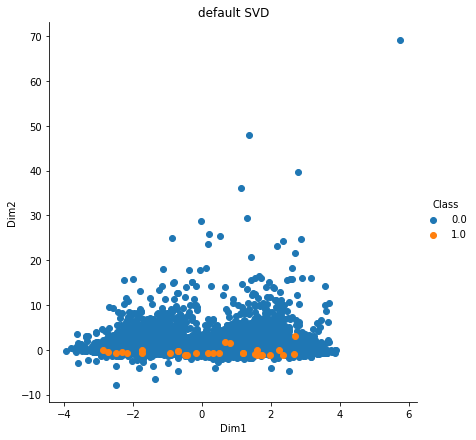

In [ ]:
# T-SNE
final_data = np.concatenate((X_reduced_tsne,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("default tsne")
plt.show()

# PCA
final_data = np.concatenate((X_reduced_pca,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("default PCA")
plt.show()

# TruncatedSVD
final_data = np.concatenate((X_reduced_svd,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])
sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("default SVD")
plt.show()

## undersampling하여 비교 
- 적은 개체인 30개로 class 0,1 모두 count 제한

In [ ]:
# Imported Libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.89 % of the dataset
Frauds 0.11 % of the dataset
Train: [ 1547  3055  4039 ... 28459 28460 28461] Test: [   0    1    2 ... 5695 5696 5697]
Train: [    0     1     2 ... 28459 28460 28461] Test: [ 1547  3055  4039 ... 11384 11385 11386]
Train: [    0     1     2 ... 28459 28460 28461] Test: [ 9326 11387 11388 ... 17080 17081 17082]
Train: [    0     1     2 ... 28459 28460 28461] Test: [15029 15030 15054 ... 22767 22768 24110]
Train: [    0     1     2 ... 22767 22768 24110] Test: [22769 22770 22771 ... 28459 28460 28461]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99894598 0.00105402]
[0.99894589 0.00105411]


In [ ]:
print(len(df[df.Class==0]))
print(len(df[df.Class==1]))

28432
30


In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:30]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
12377,124116,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,-0.293440,-0.088229,1
28146,281675,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,0.286872,1.006309,1
22627,226609,-2.894050,2.565309,-2.786070,-0.492355,0.749496,0.516088,-2.489421,-6.131037,-0.887201,...,1.187188,0.080490,0.215955,-0.377945,-0.193886,0.326708,0.239275,-0.033815,0.705142,0
20152,201539,-4.864551,1.381131,-5.164875,-2.117850,-4.623937,1.678514,-0.591490,3.264600,-2.015533,...,0.790003,0.140312,-1.500993,-1.256825,0.893834,-1.250001,-1.009627,6.343883,0.578425,0
4039,40526,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,...,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,-0.521811,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


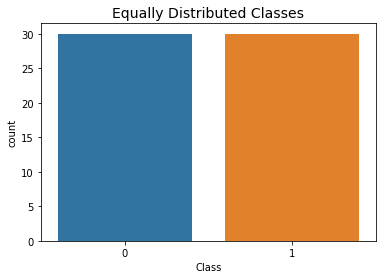

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

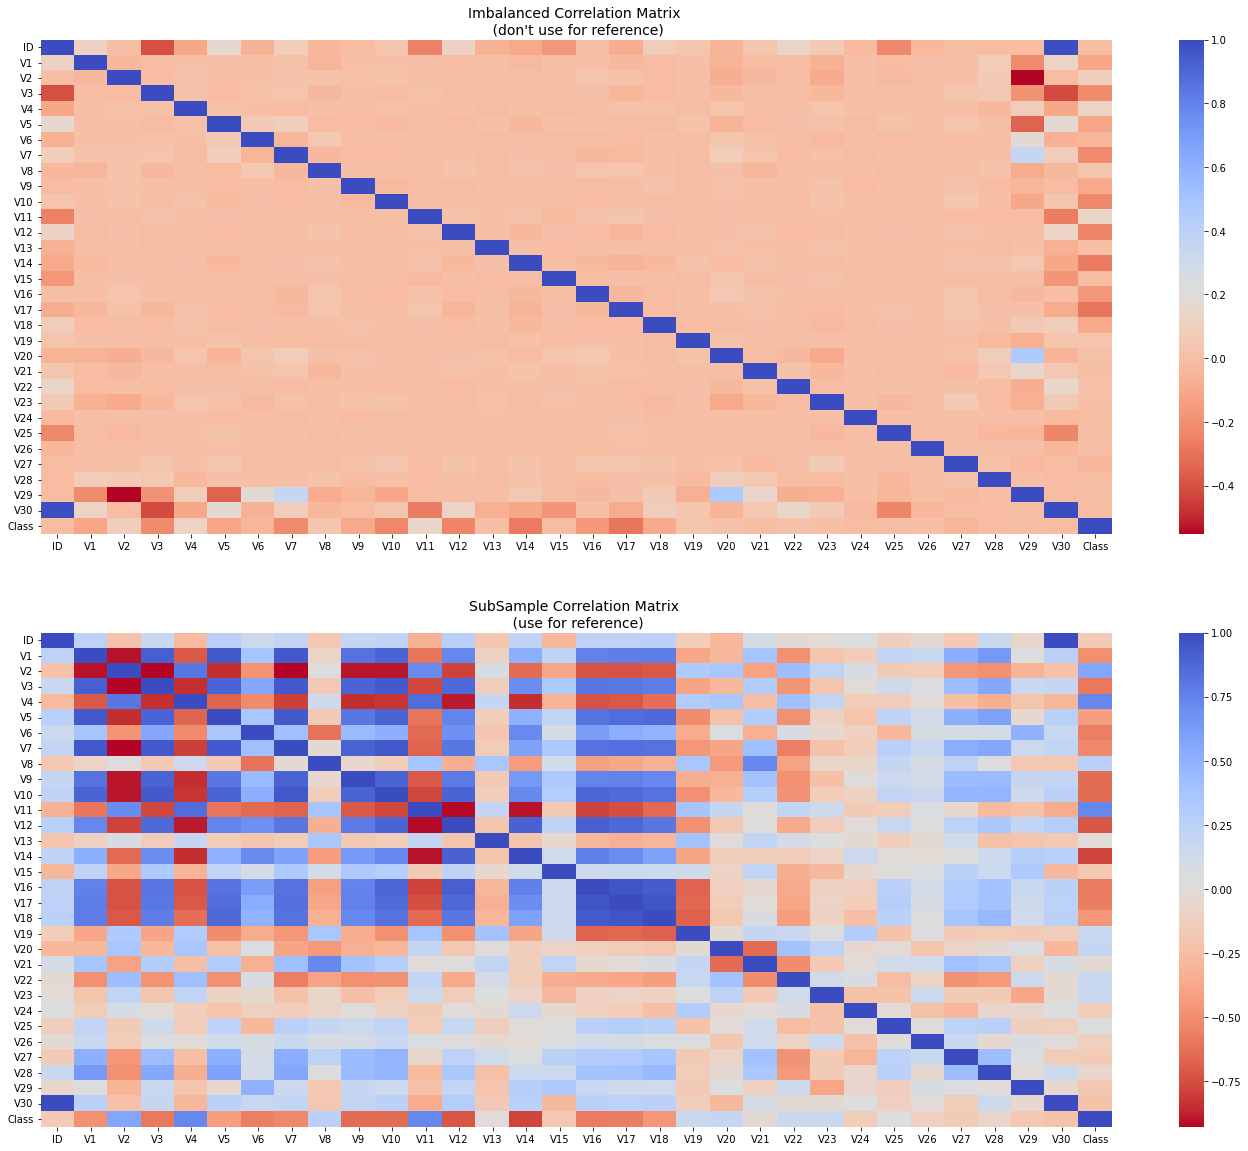

In [ ]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 0.25 s
PCA took 0.021 s
Truncated SVD took 0.0028 s


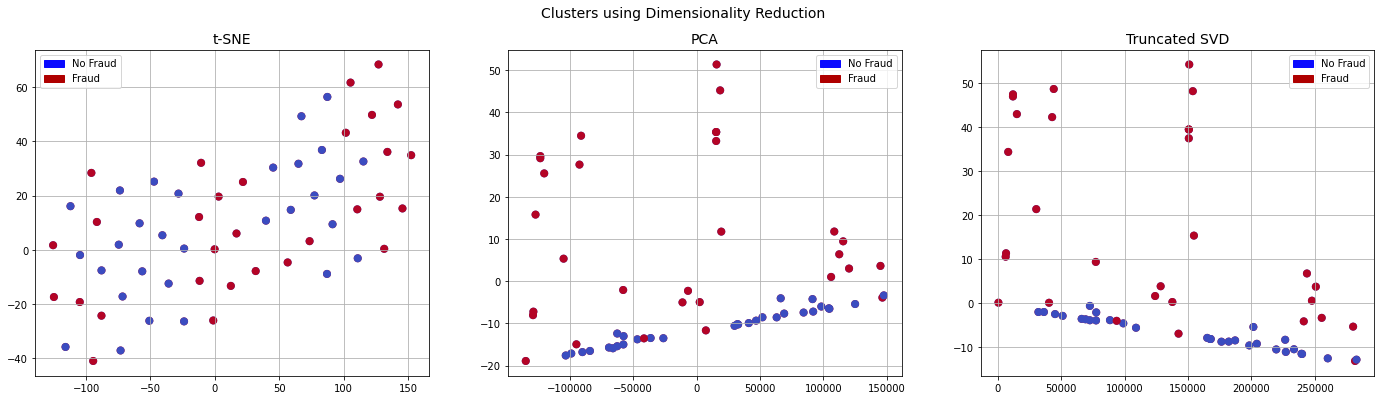

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# 연습 : 여기부분은 안보셔도 됩니다.

## 2차원

In [ ]:
# target 변수인 class 컬럼 제외 (차원축소에 활용되는 변수가 아니므로)
df_valid=df.drop('Class',axis=1)

# 2차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE(n_components=2).fit_transform(df_valid)

#numpy array -> DataFrame으로 변환
#tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2'])
tsne_df=pd.DataFrame(tsne_np)

In [ ]:
tsne_df.head()

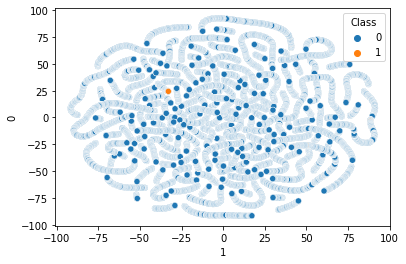

In [ ]:
tsne_df['Class']=df['Class']

sns.scatterplot(x=1,y=0,data=tsne_df, hue='Class')

## 2차원 with minmaxscaling

In [ ]:
df_MinMaxScaler=df.drop('Class',axis=1)
df_MinMaxScaler=sklearn.preprocessing.MinMaxScaler(df)


# 2차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE(n_components=2).fit_transform(df_MinMaxScaler)

#numpy array -> DataFrame으로 변환
#tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2'])
tsne_df=pd.DataFrame(tsne_np)

In [ ]:
tsne_df.head()

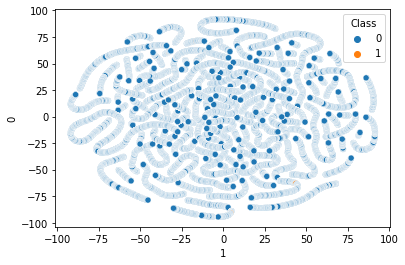

In [ ]:
tsne_df['Class']=df['Class']

sns.scatterplot(x=1,y=0,data=tsne_df, hue='Class')

## 정규화한 데이터 3차원 축소

In [ ]:
from sklearn.manifold import TSNE

scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)

# 3차원 t-SNE Embedding
# n_components = 축소될 차원수를 설정
tsne_np = TSNE(n_components=3).fit_transform(sample_features)

#numpy array -> DataFrame으로 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['new_V1','new_V2','new_V3'])

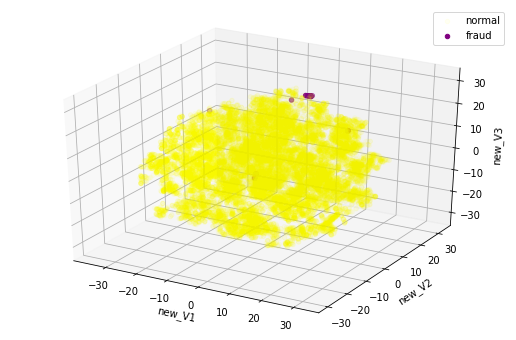

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# class target 정보 불러오기 
tsne_df['Class'] = df['Class']

# class 별 분리
tsne_df_0 = tsne_df[tsne_df['Class'] == 0]
tsne_df_1 = tsne_df[tsne_df['Class'] == 1]

# target 별 시각화
ax.scatter(tsne_df_0['new_V1'], tsne_df_0['new_V2'], tsne_df_0['new_V3'], c = 'yellow', label = 'normal',alpha=0.05)
ax.scatter(tsne_df_1['new_V1'], tsne_df_1['new_V2'], tsne_df_1['new_V3'], c = 'purple', label = 'fraud')


ax.set_xlabel('new_V1')
ax.set_ylabel('new_V2')
ax.set_zlabel('new_V3')
ax.legend()
plt.show()

# 모델에 사용할 차원축소 df 제작

## 함수 작성

In [ ]:
# 데이터셋 feature들을 n차원으로 축소
# 축소되어 생성된 feature들을 각각 new_V1, new V2,...로 하는 df생성하여 반환
def tSNE(df,n):
    from sklearn.manifold import TSNE
    tsne_np=TSNE(n_components=n).fit_transform(df)
    columns_=[]
    for a in range(n):
        name_of_column='new_V'+str({a+1})
        columns_.append(name_of_column)
    tsne_df=pd.DataFrame(tsne_np,columns=columns_)
    return tsne_df


# 차원수에 맞는 시각화 그래프 작성
def plot(df):
    #차원 축소 시 제거했던 class 다시 붙이기
    a=pd.read_csv('/content/drive/MyDrive/신용카드AI/val.csv')
    df['Class']=a['Class']
    if len(df.columns)==2:
        return sns.scatterplot(x=df.columns[0],y=df.columns[1],data=c, hue = 'Class').show()
    else:
        fig=plt.figure(figsize=(9.6))
        ax=fig.add_subplot(111,projection='3d')
        x=df.columns[0]
        y=df.columns[1]
        z=df.columns[2]
        return ax.scatter(x,y,z,hue='Class',alpha=0.5).show()

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/신용카드AI/val.csv')
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [ ]:
aaa=df[['V1','V2','V3']]
aaa.head()

,V1,V2,V3
0,-0.338262,1.119593,1.044367
1,0.962496,0.328461,-0.171479
2,1.145524,0.575068,0.194008
3,0.927060,-0.323684,0.387585
4,-3.005237,2.600138,1.483691


In [ ]:
plot(aaa)

In [ ]:
plot(tSNE(df_valid,2))